In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import fsolve
import anndata as ad
import scanpy as sc
from PIL import Image
import tifffile as tifi
import squidpy as sq
import networkx as nx
import os
import json

**Original Data**


In [ ]:
adata = sc.read_10x_h5(
    "../Data/skin_TXK6Z4X_A1/outs/binned_outputs/square_008um/filtered_feature_bc_matrix.h5"
)
adata.var_names_make_unique()
umi_counts = adata.to_df()
umi_counts

/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  \
s_008um_00301_00321-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00602_00290-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00515_00112-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00526_00291-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00681_00396-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
...                       ...    ...     ...      ...    ...   ...    ...   
s_008um_00653_00166-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00353_00477-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00797_00672-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00565_00244-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   
s_008um_00373_00222-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   

                       AGRN  RNF223  C1orf159  ...  MT-ND2  MT-CO2  MT-ATP6  \
s_008um_00301_00321-1   0.0     0.0       0.0  ...     0.0     0.0      1.0   
s_008um_00602_00290-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00515_00112-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00526_00291-1   0.0     0.0       0.0  ...     0.0     1.0      0.0   
s_008um_00681_00396-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
...                     ...     ...       ...  ...     ...     ...      ...   
s_008um_00653_00166-1   0.0     0.0       0.0  ...     1.0     0.0      0.0   
s_008um_00353_00477-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00797_00672-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00565_00244-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   
s_008um_00373_00222-1   0.0     0.0       0.0  ...     0.0     0.0      0.0   

                       MT-CO3  MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  
s_008um_00301_00321-1     1.0     0.0      2.0     0.0     0.0     0.0     0.0  
s_008um_00602_00290-1     0.0     0.0      0.0     1.0     0.0     0.0     0.0  
s_008um_00515_00112-1     1.0     0.0      0.0     1.0     0.0     0.0     0.0  
s_008um_00526_00291-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
s_008um_00681_00396-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
...                       ...     ...      ...     ...     ...     ...     ...  
s_008um_00653_00166-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00353_00477-1     0.0     0.0      1.0     0.0     0.0     0.0     0.0  
s_008um_00797_00672-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00565_00244-1     0.0     0.0      0.0     0.0     0.0     0.0     0.0  
s_008um_00373_00222-1     0.0     1.0      1.0     0.0     1.0     1.0     0.0  

[310118 rows x 18085 columns]

**Processed Data**


In [ ]:
# Anndata object path
cells_adata_path = (
    "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area|celltypist_cells_adata.h5"
)

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

In [4]:
adata = sc.read_h5ad(cells_adata_path)

In [4]:
umi_counts = adata.to_df()
umi_counts

PERM1  CCDC27  TNFRSF9  ANGPTL7  C1orf158  PRAMEF11  PRAMEF10  \
id                                                                        
ID_1          0       0        0        0         0         0         0   
ID_10         0       0        0        0         0         0         0   
ID_100        0       0        0        0         0         0         0   
ID_1000       0       0        0        0         0         0         0   
ID_1001       0       0        0        0         0         0         0   
...         ...     ...      ...      ...       ...       ...       ...   
ID_81072      0       0        0        0         0         0         0   
ID_81078      0       0        0        0         0         0         0   
ID_81096      0       0        0        0         0         0         0   
ID_81115      0       0        0        0         0         0         0   
ID_81131      0       0        0        0         0         0         0   

          PRAMEF6  PRAMEF18  PDPN  ...  MAGEC1  SPANXN3  MAGEA11  MAGEA10  \
id                                 ...                                      
ID_1            0         0     0  ...       0        0        0        0   
ID_10           0         0     0  ...       0        0        0        0   
ID_100          0         0     0  ...       0        0        0        0   
ID_1000         0         0     0  ...       0        0        0        0   
ID_1001         0         0     0  ...       0        0        0        0   
...           ...       ...   ...  ...     ...      ...      ...      ...   
ID_81072        0         0     0  ...       0        0        0        0   
ID_81078        0         0     0  ...       0        0        0        0   
ID_81096        0         0     0  ...       0        0        0        0   
ID_81115        0         0     0  ...       0        0        0        0   
ID_81131        0         0     0  ...       0        0        0        0   

          MAGEA6  PNMA6E  BGN  TKTL1  RAB39B  NLGN4Y  
id                                                    
ID_1           0       0    0      0       0       0  
ID_10          0       0    0      0       0       0  
ID_100         0       0    0      0       0       0  
ID_1000        0       0    0      0       0       0  
ID_1001        0       0    0      0       0       0  
...          ...     ...  ...    ...     ...     ...  
ID_81072       0       0    0      0       0       0  
ID_81078       0       0    0      0       0       0  
ID_81096       0       0    1      0       0       0  
ID_81115       0       0    0      0       0       0  
ID_81131       0       0    0      0       0       0  

[101835 rows x 1084 columns]

In [5]:
adata.obs["cell_type"]

id
ID_1          cd19+cd20+ b
ID_10         cd19+cd20+ b
ID_100        cd19+cd20+ b
ID_1000               cms2
ID_1001               cms2
                 ...      
ID_81072         stromal 1
ID_81078    myofibroblasts
ID_81096    myofibroblasts
ID_81115    myofibroblasts
ID_81131         stromal 1
Name: cell_type, Length: 101835, dtype: category
Categories (24, object): ['cd19+cd20+ b', 'cd4+ t cells', 'cd8+ t cells', 'cms1', ..., 'stromal 3', 't helper 17 cells', 'tip-like ecs', 'unknown']

In [16]:
adata.obsm

AxisArrays with keys: spatial, stats

In [ ]:
adata.obsm["spatial"]

cell_x  cell_y
id                      
ID_1        3526    3780
ID_10       3146    3938
ID_100      3756    3707
ID_1000     2756    3433
ID_1001     2942    3566
...          ...     ...
ID_81072    7570    7403
ID_81078    7905    7592
ID_81096    7450    7731
ID_81115    7768    7904
ID_81131    7531    7657

[101835 rows x 2 columns]

In [18]:
adata.obsm["stats"]

num_shared_bins  num_unique_bins  num_transcripts
id                                                         
ID_1                   24               12                3
ID_10                   6               80               13
ID_100                 23               26                6
ID_1000                22                6                0
ID_1001                21               16                0
...                   ...              ...              ...
ID_81072               28               14                5
ID_81078               22                9                9
ID_81096               12               25               10
ID_81115                7               42                1
ID_81131               26               22               57

[101835 rows x 3 columns]

**get data for cell interaction**


In [ ]:
umi_counts.to_csv("skin_TXK6Z4X_A1_interaction_counts.txt", sep="\t")

In [ ]:
df_obs = adata.obs[["cell_type"]].copy()
df_spatial = pd.DataFrame(adata.obsm["spatial"], columns=["cell_x", "cell_y"])

df_obs.index.name = "id"
df_spatial.index.name = "id"

df_merged = df_obs.merge(df_spatial, left_index=True, right_index=True)

df_merged = df_merged.reset_index().rename(columns={"cell_x": "X", "cell_y": "Y"})

df_merged = df_merged[["id", "X", "Y", "cell_type"]]

df_merged.to_csv("skin_TXK6Z4X_A1_interaction_metadata.txt", sep="\t", index=False)

**image size**


In [ ]:
img = Image.open(wsi_path)

width, height = img.size
print(f"Image size: {width} x {height} pixels")

try:
    num_layers = 1
    while True:
        img.seek(num_layers)
        num_layers += 1
except EOFError:
    pass

print(f"Number of layers: {num_layers}")

Image size: 13030 x 13511 pixels
Number of layers: 1


/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (176048330 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


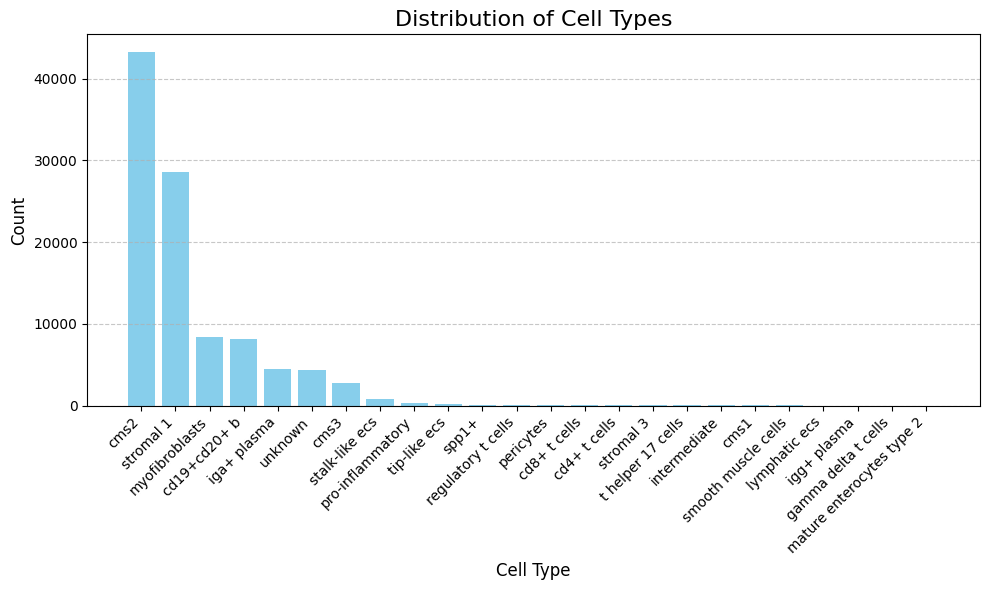

In [ ]:
cell_type_counts = adata.obs["cell_type"].value_counts().reset_index()
cell_type_counts.columns = ["Cell Type", "Count"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(cell_type_counts["Cell Type"], cell_type_counts["Count"], color="skyblue")
plt.title("Distribution of Cell Types", fontsize=16)
plt.xlabel("Cell Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Plotting number of shared bins per cell, number of unique bins per cell, and number of transcripts per cell.**

_Note: In the figures below, each dot is a cell_


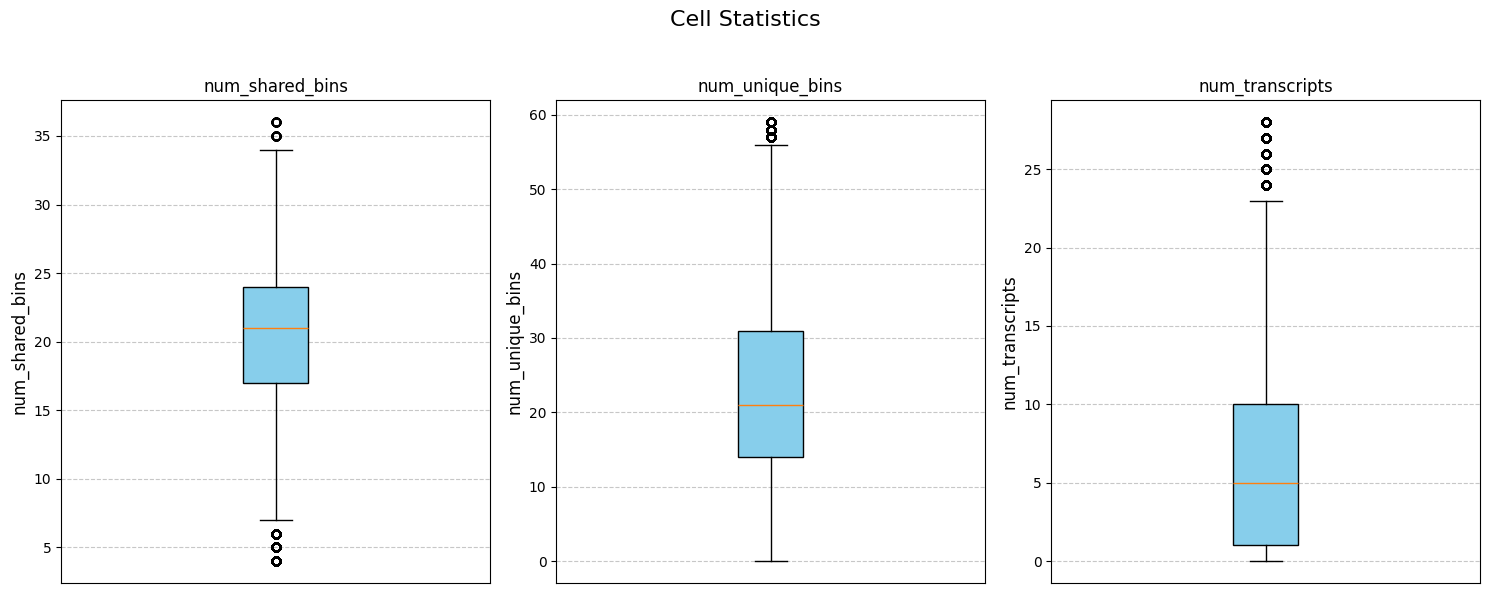

In [ ]:
# Extract the stats DataFrame from adata
stats_df = adata.obsm["stats"]


# Function to remove outliers using IQR
def remove_outliers(series):
    q1 = series.quantile(0.25)  # First quartile (25th percentile)
    q3 = series.quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower bound
    upper_bound = q3 + 1.5 * iqr  # Upper bound
    return series[(series >= lower_bound) & (series <= upper_bound)]


# Remove outliers from the DataFrame
filtered_stats_df = stats_df.apply(remove_outliers)

# Create subplots: one subplot for each column
num_columns = len(filtered_stats_df.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 6), sharey=False)
for i, column in enumerate(filtered_stats_df.columns):
    axes[i].boxplot(
        filtered_stats_df[column].dropna(),
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
    )
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xticks([])
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)
    axes[i].set_ylabel(column, fontsize=12)
fig.suptitle("Cell Statistics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title


# Show the plot
plt.show()

**Getting Cell Coorinates**


In [22]:
adata.obsm["spatial"]

cell_x  cell_y
id                      
ID_1        3526    3780
ID_10       3146    3938
ID_100      3756    3707
ID_1000     2756    3433
ID_1001     2942    3566
...          ...     ...
ID_81072    7570    7403
ID_81078    7905    7592
ID_81096    7450    7731
ID_81115    7768    7904
ID_81131    7531    7657

[101835 rows x 2 columns]

**Plotting the top-n expressed genes**

Plotting the top-n genes by count (summed across all cells)

_Note: ENACT only keeps the top-k highly variable genes in the AnnData object if params>use_hvg is set to True._


Number of unique genes in the sample: 1084


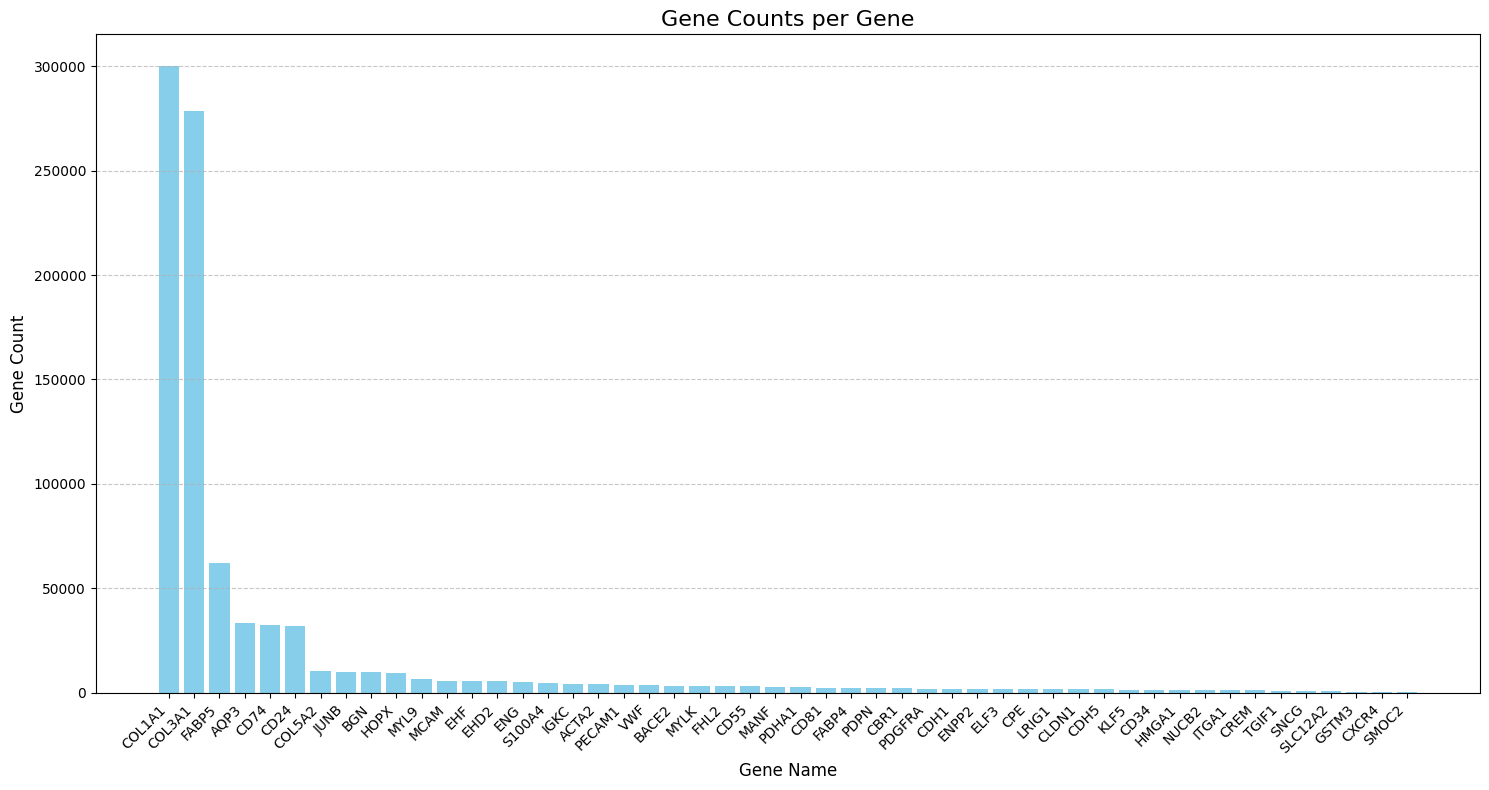

In [ ]:
top_n = 50  # Adjust the number of genes to display

# Compute gene counts
counts_per_gene = pd.DataFrame(
    {"Gene Name": adata.var_names, "Gene Count": adata.X.sum(axis=0)}
).sort_values(by="Gene Count", ascending=False)
print(f"Number of unique genes in the sample: {len(counts_per_gene)}")

# Select the top N genes
top_genes = counts_per_gene[:top_n]

# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(top_genes["Gene Name"], top_genes["Gene Count"], color="skyblue")
plt.title("Gene Counts per Gene", fontsize=16)
plt.xlabel("Gene Name", fontsize=12)
plt.ylabel("Gene Count", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Visualizing cell types over the image**


Patch bounds: x_min, x_max, y_min, y_max = (5000, 6000, 5000, 6000)


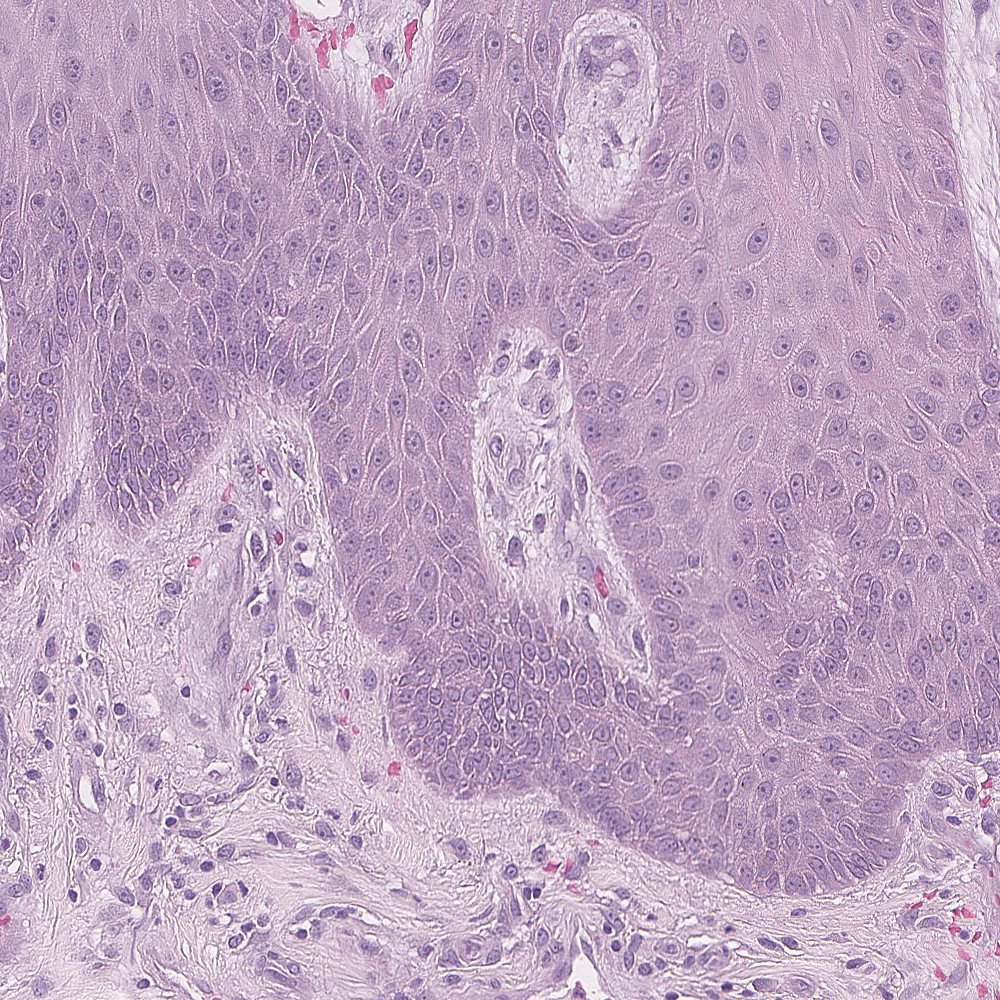

In [ ]:
x_start, y_start = 5000, 5000  # Top-left corner of the patch
patch_size = 1000  # Specify the patch size

Image.MAX_IMAGE_PIXELS = None
wsi_img = tifi.imread(wsi_path)
cells_layer = np.array(Image.open(cells_layer_path))
x_min, x_max, y_min, y_max = (
    x_start,
    x_start + patch_size,
    y_start,
    y_start + patch_size,
)
patch = wsi_img[y_min:y_max, x_min:x_max]
patch_boundaries = cells_layer[y_min:y_max, x_min:x_max]
# Convert the NumPy array to a PIL Image
patch_image = Image.fromarray(patch)
print(f"Patch bounds: x_min, x_max, y_min, y_max = {x_min, x_max, y_min, y_max}")
patch_image

**Get the cells within a patch and represent their coordinates in the patch frame of reference.**


In [25]:
df = adata.obsm["spatial"].copy()
df["cell_type"] = adata.obs["cell_type"]
df

cell_x  cell_y       cell_type
id                                      
ID_1        3526    3780    cd19+cd20+ b
ID_10       3146    3938    cd19+cd20+ b
ID_100      3756    3707    cd19+cd20+ b
ID_1000     2756    3433            cms2
ID_1001     2942    3566            cms2
...          ...     ...             ...
ID_81072    7570    7403       stromal 1
ID_81078    7905    7592  myofibroblasts
ID_81096    7450    7731  myofibroblasts
ID_81115    7768    7904  myofibroblasts
ID_81131    7531    7657       stromal 1

[101835 rows x 3 columns]

In [ ]:
patch_adata = adata[
    adata.obsm["spatial"].cell_x.between(x_min, x_max)
    & adata.obsm["spatial"].cell_y.between(y_min, y_max)
]
patch_cell_coords = patch_adata.obsm["spatial"]
print(f"Number of cells in patch: {patch_cell_coords.shape[0]}")

# Adjust coordinates relative to the patch
patch_cell_coords_df = patch_cell_coords.copy()
patch_cell_coords_df["cell_x_relative"] = patch_cell_coords_df["cell_x"] - x_start
patch_cell_coords_df["cell_y_relative"] = patch_cell_coords_df["cell_y"] - y_start
patch_cell_coords_df["cell_type"] = patch_adata.obs["cell_type"]
patch_cell_coords_df

Number of cells in patch: 1719


cell_x  cell_y  cell_x_relative  cell_y_relative    cell_type
id                                                                     
ID_23791    5743    5500              743              500  iga+ plasma
ID_23792    5860    5362              860              362  iga+ plasma
ID_23793    5685    5386              685              386         cms2
ID_23795    5780    5500              780              500         cms2
ID_23799    5950    5305              950              305  iga+ plasma
...          ...     ...              ...              ...          ...
ID_36262    5273    5748              273              748      unknown
ID_36278    5140    5600              140              600    stromal 1
ID_36281    5877    5011              877               11         cms2
ID_36287    5434    5956              434              956         cms2
ID_36301    5236    5804              236              804    stromal 1

[1719 rows x 5 columns]

In [ ]:
def plot_image_with_cell_overlays(
    patch,
    patch_boundaries,
    patch_cell_coords_df,
    patch_size,
    alpha=0.6,
    colormap=plt.cm.tab10,
):
    """
    Plots an image patch with overlaid cell coordinates color-coded by cell type.

    Parameters:
        patch (np.ndarray): The base image patch (2D or 3D array).
        patch_boundaries (np.ndarray): The boundary mask image to overlay.
        patch_cell_coords_df (pd.DataFrame): DataFrame with columns 'cell_x_relative',
                                             'cell_y_relative', and 'cell_type'.
        patch_size (int): The size of the patch (assumes square images).
        alpha (float): Transparency for blending patch and boundaries (0-1).
        colormap: Matplotlib colormap to assign colors to cell types.
    """

    # Normalize images to [0, 1]
    patch_norm = patch / 255.0

    if patch_norm.shape[-1] == 4:
        patch_norm = patch_norm[..., :3]

    patch_boundaries_norm = patch_boundaries / 255.0

    # Blend the images
    overlay_image = (1 - alpha) * patch_norm + alpha * patch_boundaries_norm

    # Generate colors for unique cell types
    cell_type_colors = {
        cell_type: f"rgb({r*255:.0f}, {g*255:.0f}, {b*255:.0f})"
        for cell_type, (r, g, b) in zip(
            patch_cell_coords_df["cell_type"].unique(), colormap.colors
        )
    }

    # Assign colors to each cell type
    patch_cell_coords_df["color"] = patch_cell_coords_df["cell_type"].map(
        cell_type_colors
    )

    # Create a Plotly figure
    fig = go.Figure()

    # Add the image as a background
    fig.add_layout_image(
        dict(
            source=Image.fromarray(
                (overlay_image * 255).astype(np.uint8)
            ),  # Convert to PIL image
            x=0,
            y=patch_size,
            xref="x",
            yref="y",
            sizex=patch_size,
            sizey=patch_size,
            xanchor="left",
            yanchor="top",
            layer="below",
        )
    )

    # Add scatter points for the coordinates
    fig.add_trace(
        go.Scatter(
            x=patch_cell_coords_df["cell_x_relative"],
            y=patch_size - patch_cell_coords_df["cell_y_relative"],  # Invert y-axis
            mode="markers",
            marker=dict(
                color=patch_cell_coords_df["color"],  # Color-coding by cell type
                size=10,
            ),
            name="Coordinates",
            hoverinfo="text",
            text=patch_cell_coords_df["cell_type"],  # Hover displays cell type
        )
    )

    # Set axis properties to match the image size and fix zoom alignment
    fig.update_xaxes(
        range=[0, patch_size],
        visible=False,
        scaleanchor="y",
    )
    fig.update_yaxes(
        range=[0, patch_size],
        visible=False,
        scaleanchor="x",
    )

    # Update layout to remove padding and ensure consistent scaling
    fig.update_layout(
        title="Image Patch with Cell Overlays",
        height=1000,
        width=1000,
        margin=dict(l=0, r=0, t=0, b=0),  # No margin
    )

    return fig


fig = plot_image_with_cell_overlays(
    patch, patch_boundaries, patch_cell_coords_df, patch_size
)
fig.show()

**Neighborhood Enrichment Analysis**


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning:

Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.



  0%|          | 0/1000 [00:00<?, ?/s]

/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/squidpy/gr/_nhood.py:202: RuntimeWarning:

invalid value encountered in divide



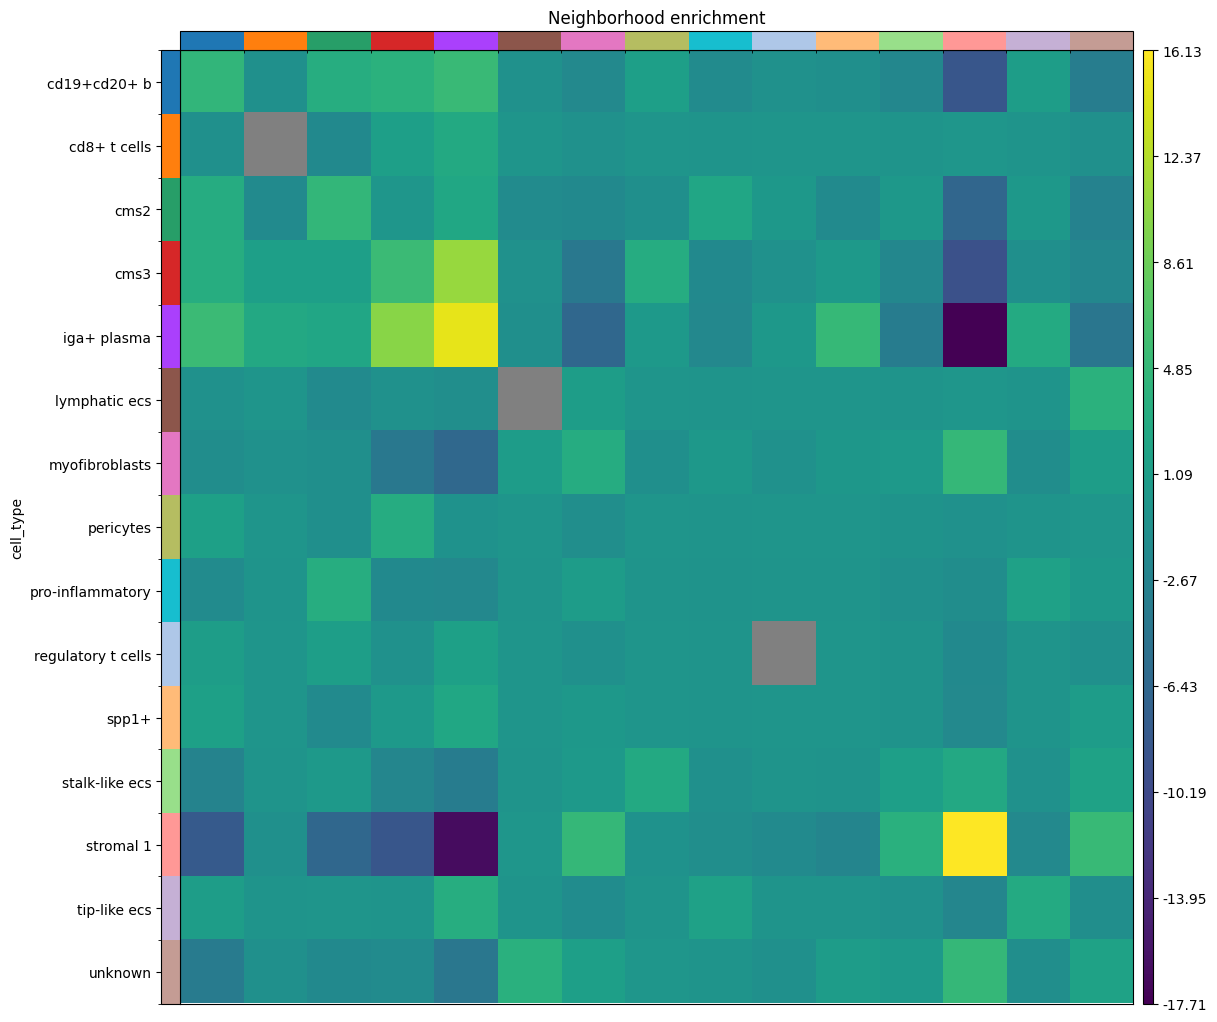

In [ ]:
def run_neighborhood_enrichment(adata):
    """Sample function to run Squidpy operations on AnnData object

    Args:
        adata (_type_): _description_

    Returns:
        _type_: _description_
    """
    sq.gr.spatial_neighbors(adata)
    sq.gr.nhood_enrichment(adata, cluster_key="cell_type")
    return adata


# Reference documentation: https://squidpy.readthedocs.io/en/stable/api/squidpy.pl.nhood_enrichment.html
run_neighborhood_enrichment(patch_adata)
sq.pl.nhood_enrichment(patch_adata, cluster_key="cell_type")

  0%|          | 0/1 [00:00<?, ?/s]

/Users/siyuanzhao/.pyenv/versions/3.10.14/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


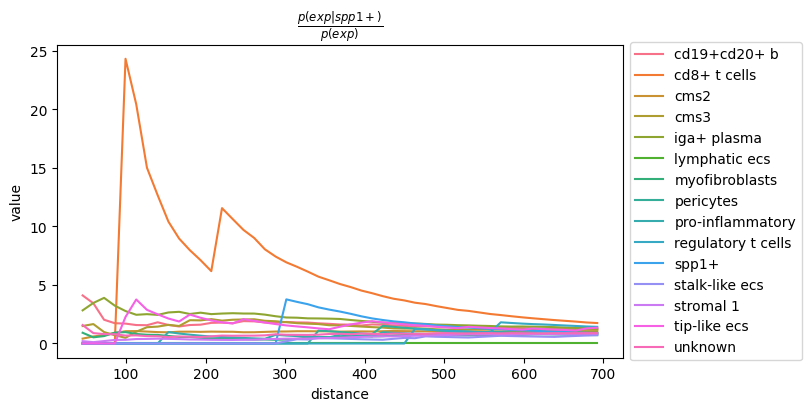

In [ ]:
test_adata = patch_adata.copy()

test_adata.obsm["spatial"] = np.array(test_adata.obsm["spatial"])
sq.gr.co_occurrence(test_adata, cluster_key="cell_type")
sq.pl.co_occurrence(
    test_adata, cluster_key="cell_type", clusters="spp1+", figsize=(8, 4)
)

**Cell interaction analysis**


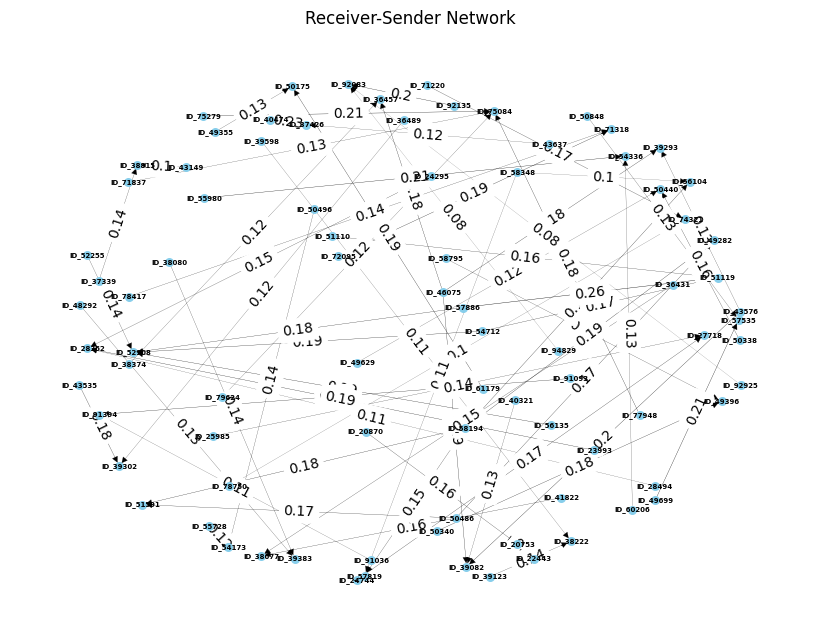

In [ ]:
file_path = "../Spacia/output_test/Interactions.csv"

df = pd.read_csv(file_path)

G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row["Sender"], row["Receiver"], weight=row["Primary_instance_score"])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42, k=0.5)

edge_widths = [G[u][v]["weight"] for u, v in G.edges()]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=30,
    node_color="skyblue",
    font_size=5,
    font_weight="bold",
    arrows=True,
    width=edge_widths,
)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title("Receiver-Sender Network")
plt.show()

In [ ]:
def split_tif_pil(input_tif, output_folder, tile_size):
    os.makedirs(output_folder, exist_ok=True)

    Image.MAX_IMAGE_PIXELS = None
    img = Image.open(input_tif)
    width, height = img.size

    for i in range(0, width, tile_size):
        for j in range(0, height, tile_size):
            box = (i, j, min(i + tile_size, width), min(j + tile_size, height))
            tile = img.crop(box)

            output_path = os.path.join(output_folder, f"tile_{i}_{j}.tif")
            tile.save(output_path, format="TIFF")
            print(f"Saved {output_path}")


split_tif_pil(
    "../Data/skin_TXK6Z4X_D1_processed/tmap/wsi.tif", "output_tiles", tile_size=256
)

Saved output_tiles/tile_0_0.tif
Saved output_tiles/tile_0_256.tif
Saved output_tiles/tile_0_512.tif
Saved output_tiles/tile_0_768.tif
Saved output_tiles/tile_0_1024.tif
Saved output_tiles/tile_0_1280.tif
Saved output_tiles/tile_0_1536.tif
Saved output_tiles/tile_0_1792.tif
Saved output_tiles/tile_0_2048.tif
Saved output_tiles/tile_0_2304.tif
Saved output_tiles/tile_0_2560.tif
Saved output_tiles/tile_0_2816.tif
Saved output_tiles/tile_0_3072.tif
Saved output_tiles/tile_0_3328.tif
Saved output_tiles/tile_0_3584.tif
Saved output_tiles/tile_0_3840.tif
Saved output_tiles/tile_0_4096.tif
Saved output_tiles/tile_0_4352.tif
Saved output_tiles/tile_0_4608.tif
Saved output_tiles/tile_0_4864.tif
Saved output_tiles/tile_0_5120.tif
Saved output_tiles/tile_0_5376.tif
Saved output_tiles/tile_0_5632.tif
Saved output_tiles/tile_0_5888.tif
Saved output_tiles/tile_0_6144.tif
Saved output_tiles/tile_0_6400.tif
Saved output_tiles/tile_0_6656.tif
Saved output_tiles/tile_0_6912.tif
Saved output_tiles/tile_0_

In [7]:
image_tif = Image.open("../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif")
image_mark = Image.open("../Data/skin_TXK6Z4X_A1_processed/cells_layer.png")
print(image_tif.size, image_mark.size)

(13030, 13511) (13030, 13511)


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (176048330 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [10]:
# tissue_pos_list = pd.read_parquet("../Data/skin_TXK6Z4X_A1/outs/binned_outputs/square_002um/spatial/tissue_positions.parquet")
# image_path = "../Data/skin_TXK6Z4X_A1/outs/spatial/tissue_hires_image.png"
# scale_path = "../Data/skin_TXK6Z4X_A1/outs/binned_outputs/square_002um/spatial/scalefactors_json.json"

tissue_pos_list = pd.read_parquet(
    "../Data/skin_TXK6Z4X_D1/outs/binned_outputs/square_002um/spatial/tissue_positions.parquet"
)
image_path = "../Data/skin_TXK6Z4X_D1/outs/spatial/tissue_hires_image.png"
scale_path = "../Data/skin_TXK6Z4X_D1/outs/binned_outputs/square_002um/spatial/scalefactors_json.json"

# Cleaning up, removing negative coords,removing out of tissue bins
tissue_pos_list_filt = tissue_pos_list[tissue_pos_list.in_tissue == 1]
tissue_pos_list_filt = tissue_pos_list_filt.copy()
tissue_pos_list_filt["pxl_row_in_fullres"] = tissue_pos_list_filt[
    "pxl_row_in_fullres"
].astype(int)
tissue_pos_list_filt["pxl_col_in_fullres"] = tissue_pos_list_filt[
    "pxl_col_in_fullres"
].astype(int)
tissue_pos_list_filt = tissue_pos_list_filt.loc[
    (tissue_pos_list_filt.pxl_row_in_fullres >= 0)
    & (tissue_pos_list_filt.pxl_col_in_fullres >= 0)
]
x_min = tissue_pos_list_filt["pxl_col_in_fullres"].min()
y_min = tissue_pos_list_filt["pxl_row_in_fullres"].min()
x_max = tissue_pos_list_filt["pxl_col_in_fullres"].max()
y_max = tissue_pos_list_filt["pxl_row_in_fullres"].max()
print(x_min, y_min, x_max, y_max)

with open(scale_path, "r") as f:
    scale_factors = json.load(f)

scale_factor = scale_factors["tissue_hires_scalef"]

x_min_scaled = int(x_min * scale_factor)
y_min_scaled = int(y_min * scale_factor)
x_max_scaled = int(x_max * scale_factor)
y_max_scaled = int(y_max * scale_factor)

image = Image.open(image_path)

cropped_image = image.crop((x_min_scaled, y_min_scaled, x_max_scaled, y_max_scaled))

# save the image
cropped_image.save("skin_TXK6Z4X_D1_full.jpg")

14261 1860 27681 15206
